In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

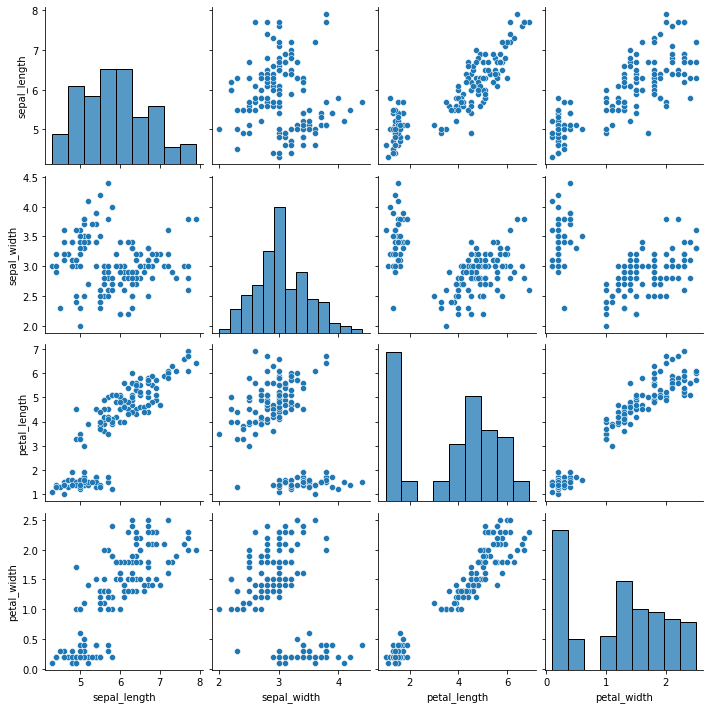

In [9]:
sns.pairplot(iris)

In [13]:
sns.set_style('whitegrid')

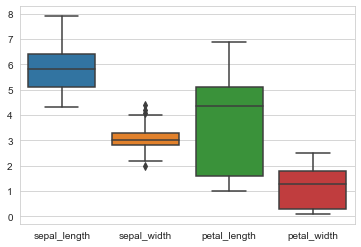

In [14]:
sns.boxplot(data=iris)

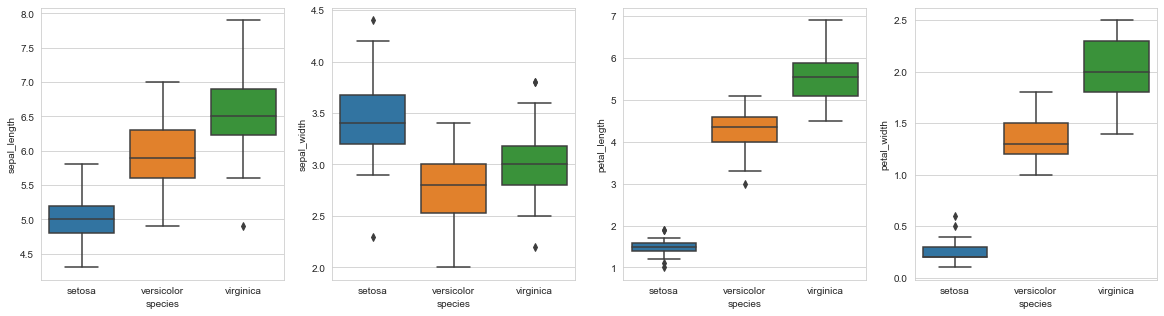

In [19]:
plt.figure(figsize=(20,5))
for ind,col in enumerate(iris.columns[:4]):
    plt.subplot(1,4,ind+1)
    sns.boxplot(x='species',y=col,data=iris)

In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(solver='newton-cg').fit(iris.drop('species',axis=1), iris['species'])

In [23]:
model.score(iris.drop('species',axis=1), iris['species'])*100

97.33333333333334

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(classification_report(iris['species'], model.predict(iris.drop('species',axis=1))))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [26]:
print(confusion_matrix(iris['species'], model.predict(iris.drop('species',axis=1))))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [27]:
pd.DataFrame(confusion_matrix(iris['species'], model.predict(iris.drop('species',axis=1))),index=iris['species'].unique(),columns=iris['species'].unique())

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,47,3
virginica,0,1,49


In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer_data = load_breast_cancer()

In [28]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [29]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [30]:
cancer_data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [31]:
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
cancer = pd.DataFrame(cancer_data['data'],columns=cancer_data['feature_names'])
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
ctype = pd.Series(cancer_data['target'])
ctype.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [34]:
ctype.value_counts()

1    357
0    212
dtype: int64

In [35]:
cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [36]:
ctype = ctype.apply(lambda x: "benign" if x else 'malignant',)

In [38]:
ctype.sample(10)

365    malignant
198    malignant
308       benign
419       benign
147       benign
265    malignant
55        benign
38     malignant
223    malignant
164    malignant
dtype: object

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(cancer,ctype,test_size=0.3,random_state=100)

In [41]:
xtrain.shape

(398, 30)

In [42]:
xtest.shape

(171, 30)

In [44]:
model = LogisticRegression(solver='newton-cg').fit(xtrain,ytrain)

In [46]:
model.score(xtest,ytest)*100

95.32163742690058

In [47]:
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96       102
   malignant       0.96      0.93      0.94        69

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

